# Analysis - All Countries 

Generating cross-country comparison visualizations from PIAAC.

Input: all_countries_processed.csv - bootstrapped data from all countries, with NA values removed
(Updated and cleaned on 25 Aug)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data Processed/all_countries_processed.csv')

C:\Users\isaac\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,9,17,18,19,20,21,22,23,24,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Subset employed people
df_employed = df[df['IS_EMPLOYED'] == True]

## Income-Age Distribution by Country

In [22]:
# Look at the overall wage-age relationship for different countries
income_by_age = df_employed.groupby(['COUNTRY', 'AGE_BIN'])['INCOME'].median().reset_index().pivot(index = 'COUNTRY',
                                                                                columns = 'AGE_BIN',
                                                                                values = 'INCOME').transpose()

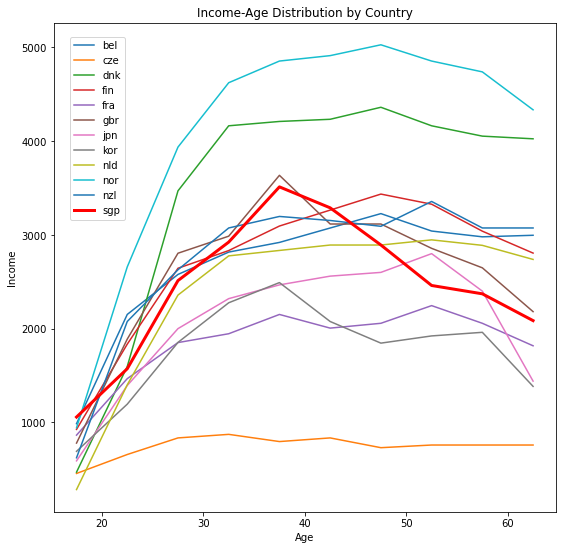

In [23]:
countries = income_by_age.columns.tolist()
plt.rcParams["figure.figsize"] = [9,9]
fig = plt.figure()

for country in sorted(countries):
    if country == 'sgp':
        ax = sns.lineplot(x = income_by_age.index, y = income_by_age[country], color = 'red', linewidth = 3)
    else:
        ax = sns.lineplot(x = income_by_age.index, y = income_by_age[country])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_title('Income-Age Distribution by Country')
fig.legend(labels = sorted(countries), bbox_to_anchor = (0.2, 0.8))
plt.show()

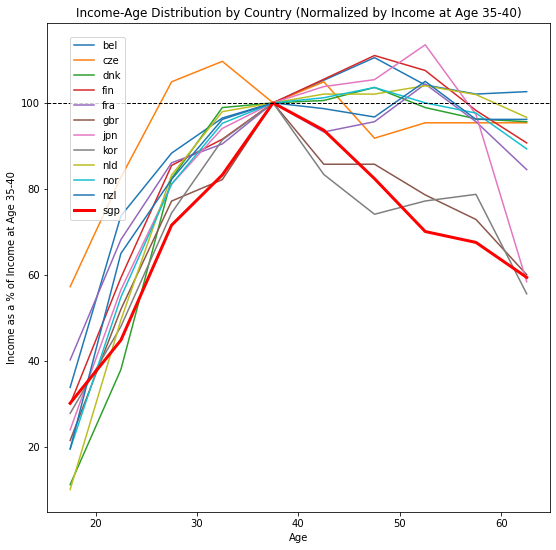

In [24]:
# Plot income-age distribution, normalized by income at age 35-40
income_by_age_normalized = income_by_age / income_by_age.loc[37.5, :] * 100

plt.rcParams["figure.figsize"] = [9,9]
fig = plt.figure()

for country in sorted(countries):
    if country == 'sgp':
        ax = sns.lineplot(x = income_by_age_normalized.index, y = income_by_age_normalized[country], color = 'red', linewidth = 3)
    else:
        ax = sns.lineplot(x = income_by_age_normalized.index, y = income_by_age_normalized[country])
ax.set_xlabel('Age')
ax.set_ylabel('Income as a % of Income at Age 35-40')
ax.set_title('Income-Age Distribution by Country (Normalized by Income at Age 35-40)')
fig.legend(labels = sorted(countries), bbox_to_anchor = (0.2, 0.8))
plt.axhline(y = 100, linewidth = 1, color = 'black', linestyle = '--')
plt.show()

## Occupational Structure - % PMET Occupations vs Age by Country

In [13]:
pmet_age_country = df_employed.groupby(['COUNTRY', 'AGE_BIN'])['OCCUPATION'].agg(lambda x: (x == 'PMET').mean()).reset_index().pivot(index = 'AGE_BIN',
                                                                                                                  columns = 'COUNTRY',
                                                                                                                  values = 'OCCUPATION') * 100

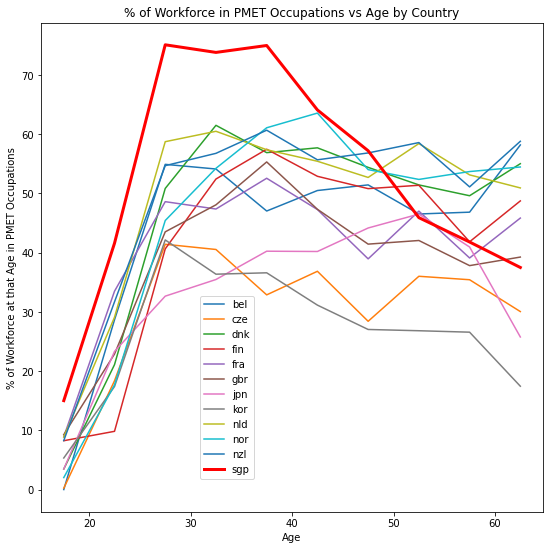

In [14]:
# Create plot, highlighting Singapore
countries = pmet_age_country.columns.tolist()

plt.rcParams["figure.figsize"] = [9,9]
fig = plt.figure()

for country in countries:
    if country == 'sgp':
        ax = sns.lineplot(x = pmet_age_country.index, y = pmet_age_country[country], color = 'red', linewidth = 3)
    else:
        ax = sns.lineplot(x = pmet_age_country.index, y = pmet_age_country[country])
ax.set_xlabel('Age')
ax.set_ylabel('% of Workforce at that Age in PMET Occupations')
ax.set_title('% of Workforce in PMET Occupations vs Age by Country')
fig.legend(labels = sorted(countries), bbox_to_anchor = (0.4, 0.4))
plt.show()

## Skill Proficiency vs Age by Country

Code shown is for LITERACY_SCORE variable, can be repeated for NUMERACY_SCORE and DIGITAL_SCORE

In [15]:
# Replace those with no Digital Score as 100 (did not show any Digital proficiency)
df_employed['DIGITAL_SCORE'] = df_employed['DIGITAL_SCORE'].replace({'No data': 100.0})
df_employed['DIGITAL_SCORE']  = df_employed['DIGITAL_SCORE'].astype(float)

C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# Get median skill proficiency by age bin and country
skill_by_age = df_employed.groupby(['COUNTRY', 'AGE_BIN'])['LITERACY_SCORE'].median().reset_index().pivot(index = 'COUNTRY',
                                                                                columns = 'AGE_BIN',
                                                                                values = 'LITERACY_SCORE').transpose()

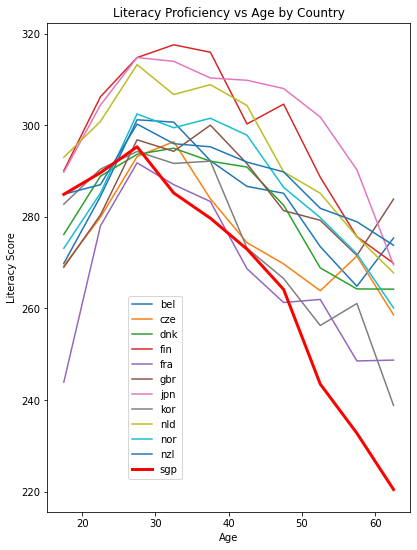

In [21]:
countries = skill_by_age.columns.tolist()

plt.rcParams["figure.figsize"] = [6.5,9]
fig = plt.figure()

for country in sorted(countries):
    if country == 'sgp':
        ax = sns.lineplot(x = skill_by_age.index, y = skill_by_age[country], color = 'red', linewidth = 3)
    else:
        ax = sns.lineplot(x = skill_by_age.index, y = skill_by_age[country])
ax.set_xlabel('Age')
ax.set_ylabel('Literacy Score')
ax.set_title('Literacy Proficiency vs Age by Country')
fig.legend(labels = sorted(countries), bbox_to_anchor = (0.4, 0.4))
plt.show()

## Education vs Age by Country

In [27]:
# Look at the overall wage-age relationship for different countries
education_by_age = df_employed.groupby(['COUNTRY', 'AGE_BIN'])['YRSQUAL'].mean().reset_index().pivot(index = 'COUNTRY',
                                                                                columns = 'AGE_BIN',
                                                                                values = 'YRSQUAL').transpose()

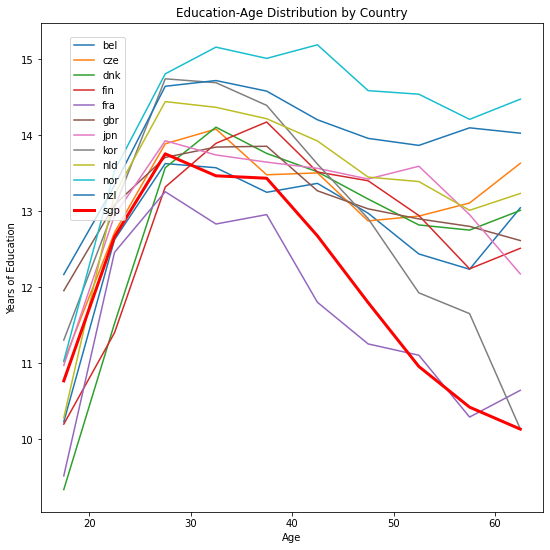

In [28]:
plt.rcParams["figure.figsize"] = [9,9]
fig = plt.figure()

for country in sorted(countries):
    if country == 'sgp':
        ax = sns.lineplot(x = education_by_age.index, y = education_by_age[country], color = 'red', linewidth = 3)
    else:
        ax = sns.lineplot(x = education_by_age.index, y = education_by_age[country])
ax.set_xlabel('Age')
ax.set_ylabel('Years of Education')
ax.set_title('Education-Age Distribution by Country')
fig.legend(labels = sorted(countries), bbox_to_anchor = (0.2, 0.8))
plt.show()

## Income-Education Distribution by Country

In [33]:
# Cut the YRSQUAL variable into bins of different levels of educational attainment
df_employed['EDUC_BIN'] = pd.cut(df_employed['YRSQUAL'], [0, 6, 10, 13, 16, 21], labels = ['Primary', 'Secondary', 'Pre-tertiary', 'Undergraduate', 'Graduate'],
                          right = True)

# Look at the overall wage-age relationship for different countries
income_by_educ = df_employed.groupby(['COUNTRY', 'EDUC_BIN'])['INCOME'].median().reset_index().pivot(index = 'COUNTRY',
                                                                                columns = 'EDUC_BIN',
                                                                                values = 'INCOME').transpose()

C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


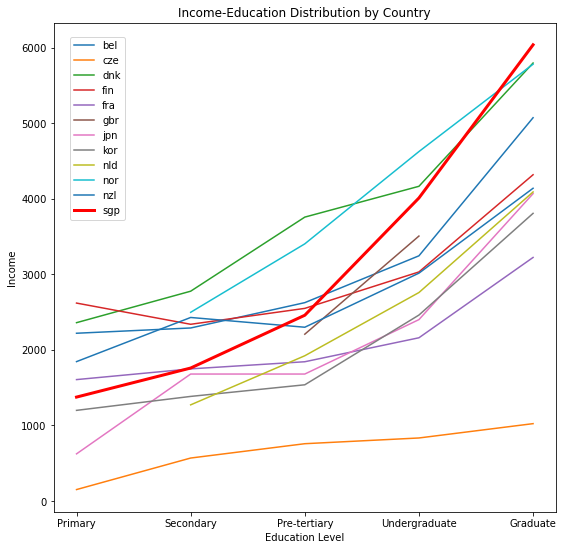

In [34]:
plt.rcParams["figure.figsize"] = [9,9]
fig = plt.figure()

for country in sorted(countries):
    if country == 'sgp':
        ax = sns.lineplot(x = income_by_educ.index, y = income_by_educ[country], color = 'red', linewidth = 3)
    else:
        ax = sns.lineplot(x = income_by_educ.index, y = income_by_educ[country])
ax.set_xlabel('Education Level')
ax.set_ylabel('Income')
ax.set_title('Income-Education Distribution by Country')
fig.legend(labels = sorted(countries), bbox_to_anchor = (0.2, 0.8))
plt.show()

## Hours Worked by Age by Country

In [40]:
df_employed['HRSWORKPERWEEK'] = df_employed['HRSWORKPERWEEK'].astype(float)

# Look at the overall wage-age relationship for different countries
hours_by_age = df_employed.groupby(['COUNTRY', 'AGE_BIN'])['HRSWORKPERWEEK'].mean().reset_index().pivot(index = 'COUNTRY',
                                                                                columns = 'AGE_BIN',
                                                                                values = 'HRSWORKPERWEEK').transpose()

C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


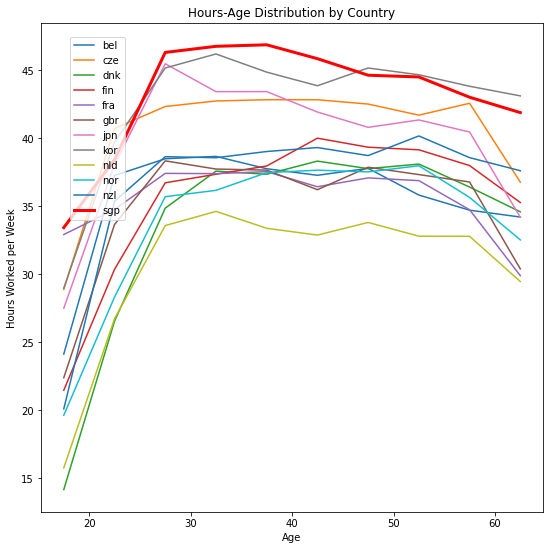

In [41]:
plt.rcParams["figure.figsize"] = [9,9]
fig = plt.figure()

for country in sorted(countries):
    if country == 'sgp':
        ax = sns.lineplot(x = hours_by_age.index, y = hours_by_age[country], color = 'red', linewidth = 3)
    else:
        ax = sns.lineplot(x = hours_by_age.index, y = hours_by_age[country])
ax.set_xlabel('Age')
ax.set_ylabel('Hours Worked per Week')
ax.set_title('Hours-Age Distribution by Country')
fig.legend(labels = sorted(countries), bbox_to_anchor = (0.2, 0.8))
plt.show()

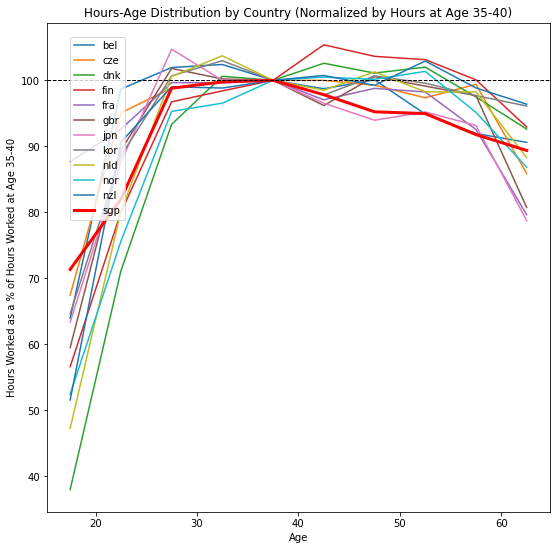

In [42]:
# Normalize hours worked per week by value at age 35-40
hours_by_age_normalized = hours_by_age / hours_by_age.loc[37.5, :] * 100

plt.rcParams["figure.figsize"] = [9,9]
fig = plt.figure()

for country in sorted(countries):
    if country == 'sgp':
        ax = sns.lineplot(x = hours_by_age_normalized.index, y = hours_by_age_normalized[country], color = 'red', linewidth = 3)
    else:
        ax = sns.lineplot(x = hours_by_age_normalized.index, y = hours_by_age_normalized[country])
ax.set_xlabel('Age')
ax.set_ylabel('Hours Worked as a % of Hours Worked at Age 35-40')
ax.set_title('Hours-Age Distribution by Country (Normalized by Hours at Age 35-40)')
fig.legend(labels = sorted(countries), bbox_to_anchor = (0.2, 0.8))
plt.axhline(y = 100, linewidth = 1, color = 'black', linestyle = '--')
plt.show()

## Skill Proficiency vs Skill Use

Code shown is for LITERACY_SCORE variable, can be repeated for NUMERACY_SCORE and DIGITAL_SCORE

In [43]:
# Create the derived vairable of LITERACY_AVG by averaging reading and writing skill utilization scores
df_employed[['READING_AVG', 'WRITING_AVG', 'NUMERACY_AVG', 'ICT_AVG']] = df_employed[['READING_AVG', 'WRITING_AVG', 'NUMERACY_AVG', 'ICT_AVG']].astype(float)
df_employed['LITERACY_AVG'] = (df_employed['READING_AVG'] + df_employed['WRITING_AVG']) / 2

C:\Users\isaac\Anaconda3\lib\site-packages\pandas\core\frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
# Create bins for skill utilization
df_employed['LITERACY_AVG_BIN'] = pd.cut(df_employed['LITERACY_AVG'], [1, 1.5, 2, 2.5, 3, 3.5, 4, 5], right = True,
                                 labels = [1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.5])
df_employed['NUMERACY_AVG_BIN'] = pd.cut(df_employed['NUMERACY_AVG'], [1, 1.5, 2, 2.5, 3, 3.5, 4, 5], right = True,
                                 labels = [1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.5])
df_employed['ICT_AVG_BIN'] = pd.cut(df_employed['ICT_AVG'], [1, 1.5, 2, 2.5, 3, 3.5, 4, 5], right = True,
                                 labels = [1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.5])

C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [52]:
skill_prof_vs_skill_use = df_employed.groupby(['LITERACY_AVG_BIN', 'COUNTRY'])['LITERACY_SCORE'].mean().reset_index().pivot(index = 'LITERACY_AVG_BIN',
                                                                                                 columns = 'COUNTRY',
                                                                                                 values = 'LITERACY_SCORE')
skill_prof_vs_skill_use = skill_prof_vs_skill_use.iloc[:, [0,1,2,3,5,6,7,8,9,10,11]]

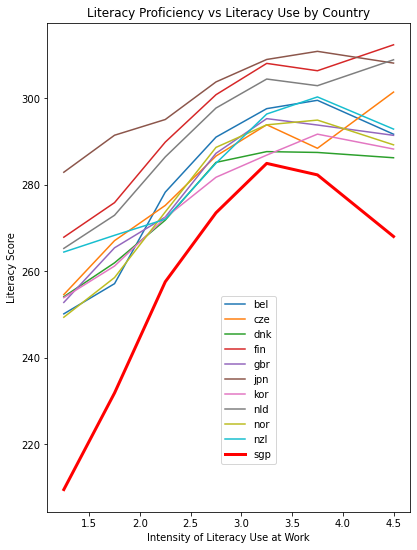

In [54]:
countries = skill_prof_vs_skill_use.columns.tolist()

plt.rcParams["figure.figsize"] = [6.5,9]
fig = plt.figure()

for country in sorted(countries):
    if country == 'sgp':
        ax = sns.lineplot(x = skill_prof_vs_skill_use.index, y = skill_prof_vs_skill_use[country], color = 'red', linewidth = 3)
    else:
        ax = sns.lineplot(x = skill_prof_vs_skill_use.index, y = skill_prof_vs_skill_use[country])
ax.set_xlabel('Intensity of Literacy Use at Work')
ax.set_ylabel('Literacy Score')
ax.set_title('Literacy Proficiency vs Literacy Use by Country')
fig.legend(labels = [e for e in sorted(countries)], bbox_to_anchor = (0.6, 0.4))
plt.show()